<a href="https://colab.research.google.com/github/miguel-kjh/Sign-languages/blob/master/Sign_abc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.models import *
from keras.layers import *
from keras.applications import VGG16
from keras import layers
from keras import optimizers
from keras import utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


0  2  4  6  8  A  C  del  F  H	J  L  N        O  Q  S	    T  V  X  Z
1  3  5  7  9  B  D  E	  G  I	K  M  nothing  P  R  space  U  W  Y


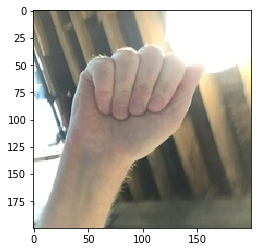

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/asl-alphabet"

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/asl-alphabet/A/A0001_test.jpg', 'r')
plt.imshow(np.asarray(pil_im))

#Data Source

In [0]:
batch_size = 64
image_size = 64

In [0]:
data_dir = '/content/drive/My Drive/Colab Notebooks/asl-alphabet'

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.25,
        zoom_range=0.25,
        horizontal_flip=True,
        validation_split=0.1)

train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset="training")

validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset="validation")

Found 2645 images belonging to 39 classes.
Found 287 images belonging to 39 classes.


#Analysis of data

In [0]:
def analysis(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(len(acc))
     
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
   
  plt.figure()
   
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
   
  plt.show()

#MODEL AND TRAIN(CNN)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(image_size, image_size, 3)))
model.add(Conv2D(32, (5, 5), activation='relu')) 
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (4, 4), activation='relu')) 
model.add(Conv2D(64, (4, 4), activation='relu')) 
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(GaussianNoise(0.25))
model.add(Dense(39, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

W0710 10:01:24.562762 139685645649792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 10:01:24.615358 139685645649792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 10:01:24.625584 139685645649792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 10:01:24.676207 139685645649792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0710 10:01:24.689916 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        25632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        65600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 64)        0         
__________

In [0]:
epochs = 100

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
)

W0710 10:01:29.364876 139685645649792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
41/41 [==============================] - 663s 16s/step - loss: 3.0740 - acc: 0.1105 - val_loss: 3.0568 - val_acc: 0.1914
Epoch 2/100
41/41 [==============================] - 18s 443ms/step - loss: 2.3238 - acc: 0.3206 - val_loss: 2.8686 - val_acc: 0.3632
Epoch 3/100
41/41 [==============================] - 13s 329ms/step - loss: 1.8456 - acc: 0.4617 - val_loss: 2.5557 - val_acc: 0.3318
Epoch 4/100
41/41 [==============================] - 13s 326ms/step - loss: 1.9009 - acc: 0.4583 - val_loss: 2.7020 - val_acc: 0.3543
Epoch 5/100
41/41 [==============================] - 13s 328ms/step - loss: 1.4068 - acc: 0.5841 - val_loss: 2.5323 - val_acc: 0.3094
Epoch 6/100
41/41 [==============================] - 14s 330ms/step - loss: 1.2302 - acc: 0.6207 - val_loss: 2.5010 - val_acc: 0.4648
Epoch 7/100
41/41 [==============================] - 14s 343ms/step - loss: 1.0968 - acc: 0.6786 - val_loss: 2.5301 - val_acc: 0.4753
Epoch 8/100
41/41 [==============================] - 13s 324ms/

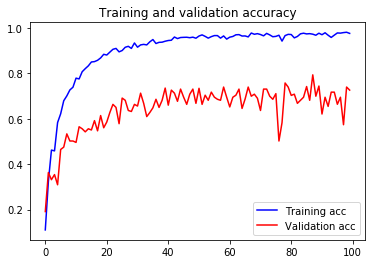

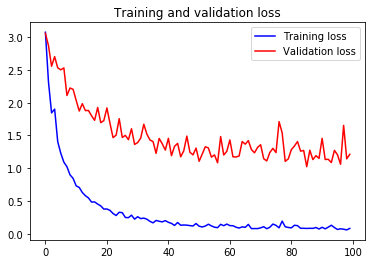

In [0]:
analysis(history)

#VGG 16

In [0]:
from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet', 
                 include_top=False, 
                 input_shape=(image_size, image_size, 3))

for layer in vgg_conv.layers[7:11]:
    layer.trainable = False
    
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
vgg_conv.summary()

<keras.engine.input_layer.InputLayer object at 0x7f0ac7cacac8> False
<keras.layers.convolutional.Conv2D object at 0x7f0ac7cacda0> True
<keras.layers.convolutional.Conv2D object at 0x7f0ac7c9b400> True
<keras.layers.pooling.MaxPooling2D object at 0x7f0ac7c995f8> True
<keras.layers.convolutional.Conv2D object at 0x7f0ac7c99d68> True
<keras.layers.convolutional.Conv2D object at 0x7f0ac7c59ac8> True
<keras.layers.pooling.MaxPooling2D object at 0x7f0ac7c6cac8> True
<keras.layers.convolutional.Conv2D object at 0x7f0ac7c6cf28> False
<keras.layers.convolutional.Conv2D object at 0x7f0ac7c1ae48> False
<keras.layers.convolutional.Conv2D object at 0x7f0ac7c2f6a0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0ac7c42c18> False
<keras.layers.convolutional.Conv2D object at 0x7f0ac7bdc278> True
<keras.layers.convolutional.Conv2D object at 0x7f0ac7c0a198> True
<keras.layers.convolutional.Conv2D object at 0x7f0ac7c0aa20> True
<keras.layers.pooling.MaxPooling2D object at 0x7f0ac7bb99e8> True
<ke

In [0]:
x = Flatten()(vgg_conv.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = GaussianNoise(0.25)(x)
x = Dense(39, activation='softmax')(x)
model_vgg16 = Model(inputs = vgg_conv.input, outputs = x)
 

model_vgg16.summary()
model_vgg16.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [0]:
epochs = 100

history = model_vgg16.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
)

Epoch 1/100
41/41 [==============================] - 18s 433ms/step - loss: 3.4050 - acc: 0.0671 - val_loss: 3.2210 - val_acc: 0.0987
Epoch 2/100
41/41 [==============================] - 14s 351ms/step - loss: 3.1822 - acc: 0.0721 - val_loss: 3.2701 - val_acc: 0.0762
Epoch 3/100
41/41 [==============================] - 15s 357ms/step - loss: 2.6736 - acc: 0.1601 - val_loss: 3.3180 - val_acc: 0.0781
Epoch 4/100
41/41 [==============================] - 15s 355ms/step - loss: 2.2918 - acc: 0.2730 - val_loss: 2.8158 - val_acc: 0.1614
Epoch 5/100
41/41 [==============================] - 15s 356ms/step - loss: 1.9164 - acc: 0.3904 - val_loss: 2.2149 - val_acc: 0.3587
Epoch 6/100
41/41 [==============================] - 15s 357ms/step - loss: 1.7297 - acc: 0.4754 - val_loss: 2.2497 - val_acc: 0.2735
Epoch 7/100
41/41 [==============================] - 14s 351ms/step - loss: 1.5392 - acc: 0.5372 - val_loss: 1.9262 - val_acc: 0.3991
Epoch 8/100
41/41 [==============================] - 14s 351ms

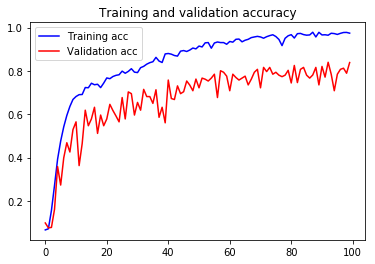

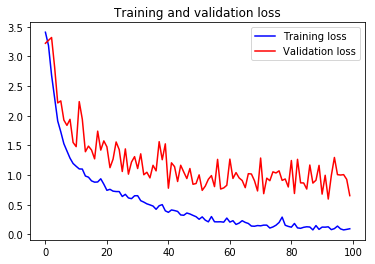

In [0]:
analysis(history)

#Save

In [0]:
model.save('/content/drive/My Drive/IA notebook/models/CNN_sabc.h5')
print("save model")

save model


In [0]:
model_vgg16.save('/content/drive/My Drive/IA notebook/models/vgg16_sabc.h5')
print("save VGG16")

save VGG16


#TEST

In [0]:
new_model_path = '/content/drive/My Drive/IA notebook/models/CNN_sabc.h5'
new_model = load_model(new_model_path)
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        25632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        65600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 64)        0         
__________

##Wedcam

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Predicción: 
a
0.9213591


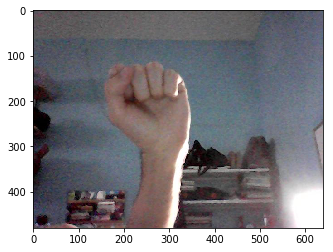

In [0]:
try:
  pil_im = Image.open(take_photo(), 'r')
  plt.imshow(np.asarray(pil_im))
  predictions = new_model.predict(np.asarray(pil_im.resize((image_size,image_size))).reshape(1,image_size,image_size,3)/255)
  print("Predicción: ")
  clss = "0 1 2 3 4 5 6 7 8 9 a b c d del e f g h i j k l m n nothing o p q r s space t u v w x y z"
  chars = clss.split()
  num = 0
  for i in predictions[0]:
    #print(i)
    if i > 0.4:
      print(chars[num])
      print(i)
    num+=1
except Exception as err:
  print(str(err))